# Prepare Data

**Import**

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

warnings.simplefilter(action="ignore", category=FutureWarning)

In [122]:
def wrangle(filepath):
  # Read csv file
  df = pd.read_csv(filepath)

  # Remove outliers from `Newspaper`
  low, high = df['Newspaper'].quantile([0, .98])
  mask_votes = df['Newspaper'].between(low, high)
  df = df[mask_votes]

  # Drop old index and reset new index
  df.reset_index(drop=True, inplace=True)

  return df


df = wrangle('dataset/advertising.csv')
print(df.shape)
df.info()

(196, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         196 non-null    float64
 1   Radio      196 non-null    float64
 2   Newspaper  196 non-null    float64
 3   Sales      196 non-null    float64
dtypes: float64(4)
memory usage: 6.2 KB


In [2]:
df = pd.read_csv('dataset/advertising.csv')

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [16]:
df['TV'].value_counts().sort_values()

206.8    1
239.9    1
142.9    1
262.9    1
62.3     1
        ..
184.9    2
197.6    2
76.4     2
240.1    2
199.8    2
Name: TV, Length: 190, dtype: int64

In [17]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**Explore**

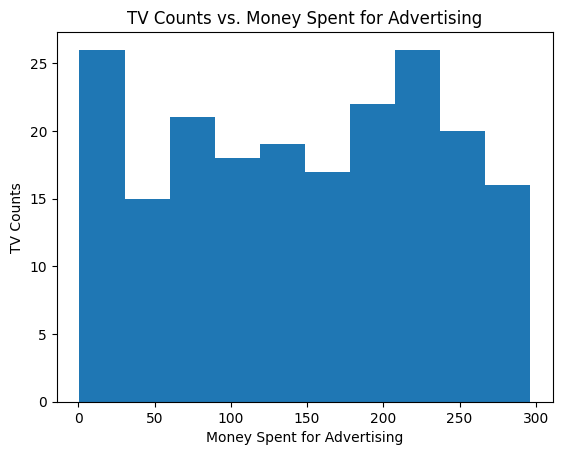

In [21]:
plt.hist(df['TV'])
plt.xlabel('Money Spent for Advertising')
plt.ylabel('TV Counts')
plt.title('TV Counts vs. Money Spent for Advertising');

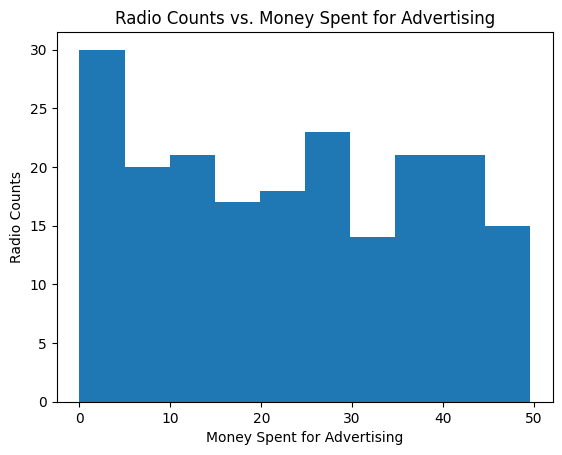

In [22]:
plt.hist(df['Radio'])
plt.xlabel('Money Spent for Advertising')
plt.ylabel('Radio Counts')
plt.title('Radio Counts vs. Money Spent for Advertising');

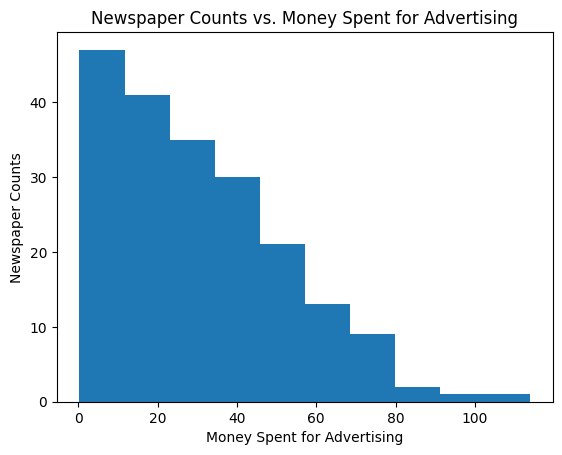

In [23]:
plt.hist(df['Newspaper'])
plt.xlabel('Money Spent for Advertising')
plt.ylabel('Newspaper Counts')
plt.title('Newspaper Counts vs. Money Spent for Advertising');

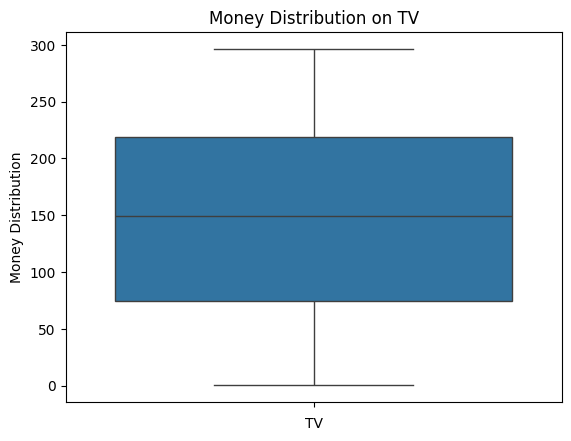

In [31]:
sns.boxplot(df['TV'])
plt.xlabel('TV')
plt.ylabel('Money Distribution')
plt.title('Money Distribution on TV');

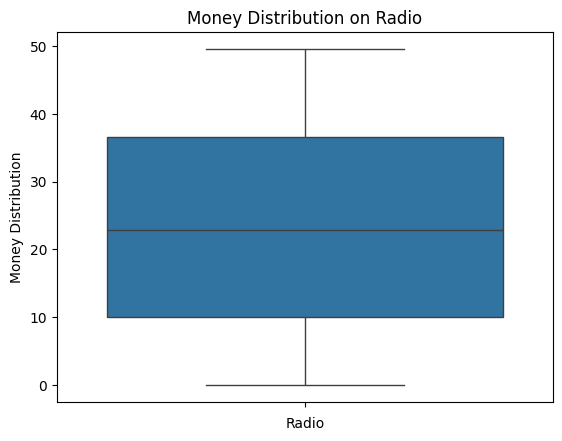

In [32]:
sns.boxplot(df['Radio'])
plt.xlabel('Radio')
plt.ylabel('Money Distribution')
plt.title('Money Distribution on Radio');

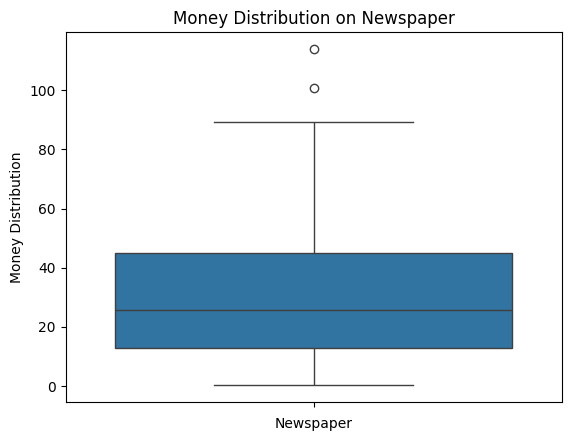

In [33]:
sns.boxplot(df['Newspaper'])
plt.xlabel('Newspaper')
plt.ylabel('Money Distribution')
plt.title('Money Distribution on Newspaper');

In [50]:
# Remove outliers from `Newspaper`
low, high = df['Newspaper'].quantile([0, .98])
low, high

(0.3, 79.31200000000005)

In [53]:
mask_votes = df['Newspaper'].between(low, high)
df = df[mask_votes]

In [55]:
df.describe()

,TV,Radio,Newspaper,Sales
count,196.000000,196.000000,196.000000,196.000000
mean,146.902551,23.126531,29.192347,15.123469
std,85.143688,14.798029,19.703791,5.276660
min,0.700000,0.000000,0.300000,1.600000
25%,75.000000,9.975000,12.550000,11.000000
50%,149.750000,22.400000,25.600000,16.000000
75%,218.425000,35.975000,43.225000,19.050000
max,293.600000,49.600000,79.200000,27.000000


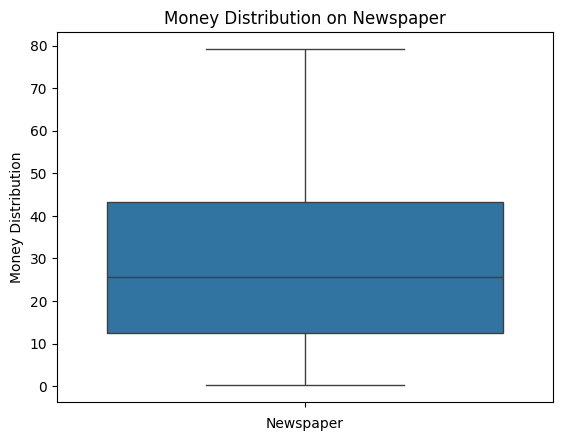

In [56]:
sns.boxplot(df['Newspaper'])
plt.xlabel('Newspaper')
plt.ylabel('Money Distribution')
plt.title('Money Distribution on Newspaper');

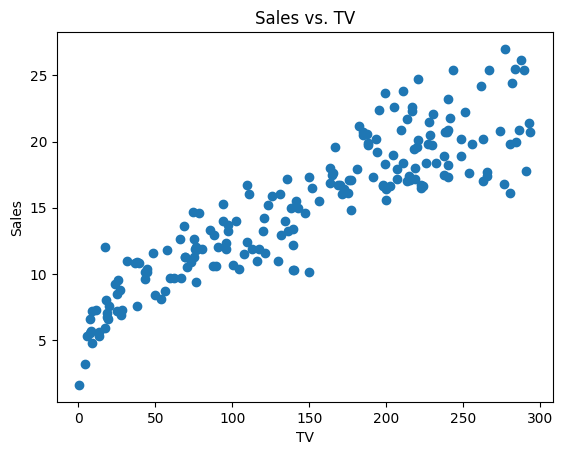

In [69]:
plt.scatter(x=df['TV'], y=df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title(f'Sales vs. TV');

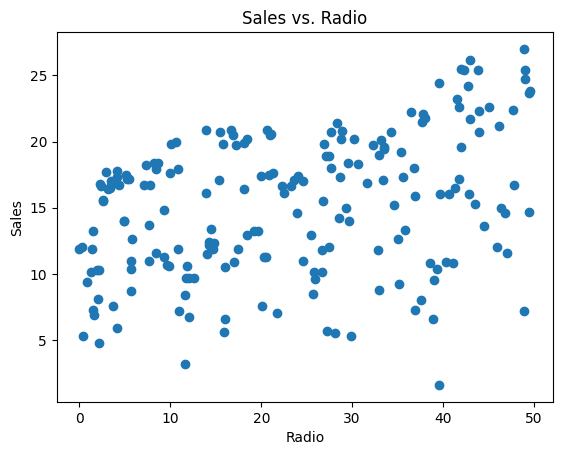

In [70]:
plt.scatter(x=df['Radio'], y=df['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title(f'Sales vs. Radio');

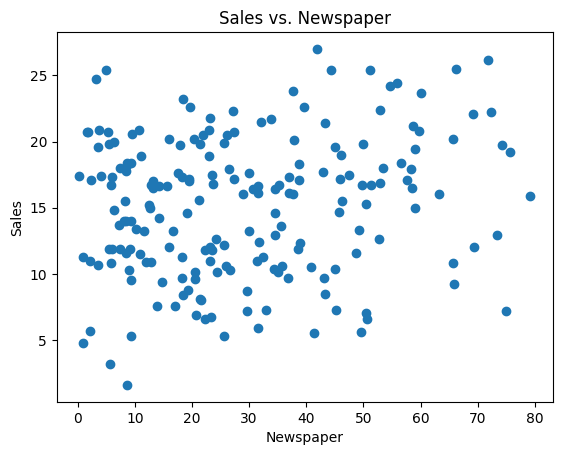

In [71]:
plt.scatter(x=df['Newspaper'], y=df['Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title(f'Sales vs. Newspaper');

In [72]:
features = df.columns[:-1]
features

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [75]:
corr = df[features].corr()
corr

,TV,Radio,Newspaper
TV,1.000000,0.070843,0.061320
Radio,0.070843,1.000000,0.362191
Newspaper,0.061320,0.362191,1.000000


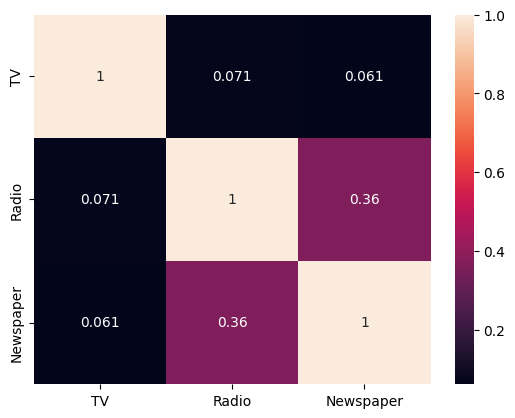

In [76]:
sns.heatmap(corr, annot=True);

In [62]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            190, 191, 192, 193, 194, 195, 196, 197, 198, 199],
           dtype='int64', length=196)

**Split**

In [65]:
features = df.columns[:-1]
features

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [66]:
target = 'Sales'
X = df[features]
y = df[target]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Scaling**

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scale = StandardScaler()
scale

StandardScaler()

In [80]:
X_train_scaled = scale.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=features)
X_train.head()

,TV,Radio,Newspaper
0,-1.557173,1.711686,2.337324
1,-1.297355,0.093566,-1.335286
2,0.450714,1.378739,-1.360509
3,-0.115642,1.232243,0.869289
4,-1.432962,-0.206085,-0.588656


In [81]:
X_test_scaled = scale.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=features)
X_test.head()

,TV,Radio,Newspaper
0,0.931015,0.754312,0.353739
1,-0.189760,-0.624459,-0.299073
2,1.770561,1.221197,1.303767
3,-0.447551,0.411443,-0.904118
4,-0.043632,-1.572820,-0.368069


# Build Model

**Baseline**

In [82]:
y_mean = y_train.mean()
y_mean

15.09871794871795

In [83]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:10]

[15.09871794871795,
 15.09871794871795,
 15.09871794871795,
 15.09871794871795,
 15.09871794871795,
 15.09871794871795,
 15.09871794871795,
 15.09871794871795,
 15.09871794871795,
 15.09871794871795]

In [85]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
mae_baseline # Our model should minimize this

4.54880013149244

**Iterate**

In [86]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [89]:
y_train[:5]

5       7.2
65     11.0
136    20.7
97     17.2
168     7.6
Name: Sales, dtype: float64

In [87]:
lr_y_pred_train = lr.predict(X_train)
lr_y_pred_train[:5]

array([10.41844225,  8.9933325 , 19.30177889, 16.48345361,  7.9219939 ])

In [90]:
# Training MAE
lr_mae_training = mean_absolute_error(y_train, lr_y_pred_train)
lr_mae_training

1.2884174938731232

In [91]:
y_test[:5]

139    20.1
113    12.2
16     24.4
75     14.2
154    10.1
Name: Sales, dtype: float64

In [92]:
lr_y_pred_test = lr.predict(X_test)
lr_y_pred_test[:5]

array([20.71392962, 13.21969383, 25.47981403, 13.55414746, 12.45511688])

In [94]:
# Test MAE
lr_mae_test = mean_absolute_error(y_test, lr_y_pred_test)
lr_mae_test # Better than Training MAE

1.2559163268113263

# Communicate Results

In [95]:
intercept = round(lr.intercept_, 2)
intercept

15.1

In [97]:
coefficients = lr.coef_
coefficients

array([4.76750932, 1.53731824, 0.04798412])

In [98]:
feature_names = lr.feature_names_in_
feature_names

array(['TV', 'Radio', 'Newspaper'], dtype=object)

In [99]:
feat_imp = pd.Series(coefficients, index=feature_names)
feat_imp

TV           4.767509
Radio        1.537318
Newspaper    0.047984
dtype: float64

In [100]:
# Rating = intercept + coef * feature
print(f'Rating: {intercept}')
for f, c in feat_imp.items():
  print(f'+ ({round(c, 2)} * {f})')

Rating: 15.1
+ (4.77 * TV)
+ (1.54 * Radio)
+ (0.05 * Newspaper)


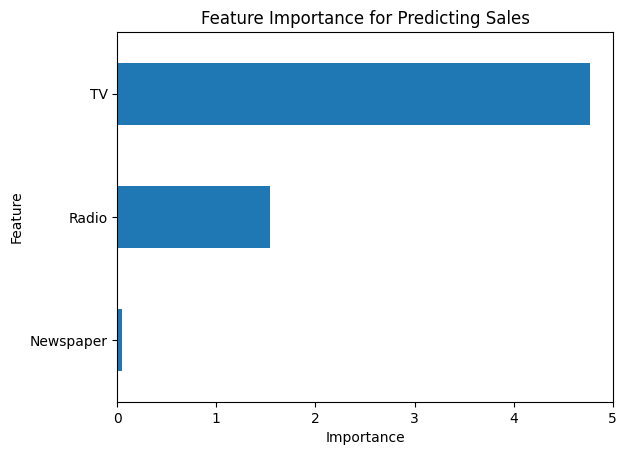

In [104]:
feat_imp.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Predicting Sales');

# Save Model

In [107]:
import pickle

# save model (Linear Regression)
with open('model/Sales_Prediction.pkl', 'wb') as f:
  pickle.dump(lr, f)

In [108]:
# load model
with open('model/Sales_Prediction.pkl', 'rb') as f:
  model_lr = pickle.load(f)

# Creating .py File

In [120]:
def wrangle(filepath):
  # Read csv file
  df = pd.read_csv(filepath)

  # Remove outliers from `Newspaper`
  low, high = df['Newspaper'].quantile([0, .98])
  mask_votes = df['Newspaper'].between(low, high)
  df = df[mask_votes]

  # Drop old index and reset new index
  df.reset_index(drop=True, inplace=True)

  return df


def make_prediction(data_filepath, model_filepath):
  X_test = wrangle(data_filepath)

  # Scaling the testing data
  scale = StandardScaler()
  X_test = scale.fit_transform(X_test)

  # load model
  with open(model_filepath, 'rb') as f:
    model = pickle.load(f)

  y_test_pred = model.predict(X_test)
  y_test_pred = pd.Series(y_test_pred)
  return y_test_pred

In [119]:
# Testing Data

"""
TV,	Radio,	Newspaper,	Sales
17.9,	37.6,	21.6,	8
44.5,	39.3,	45.1,	10.4
67.8,	36.6,	114,	12.5
8.6,	2.1,	1,	4.8
94.2,	4.9,	8.1,	14
62.3,	12.6,	18.3,	9.7
67.8,	36.6,	114,	12.5
8.7,	48.9,	75,	7.2
"""

'\nTV,\tRadio,\tNewspaper,\tSales\n17.9,\t37.6,\t21.6,\t8\n44.5,\t39.3,\t45.1,\t10.4\n67.8,\t36.6,\t114,\t12.5\n8.6,\t2.1,\t1,\t4.8\n94.2,\t4.9,\t8.1,\t14\n62.3,\t12.6,\t18.3,\t9.7\n67.8,\t36.6,\t114,\t12.5\n8.7,\t48.9,\t75,\t7.2\n'

In [121]:
pred = make_prediction(
    'dataset/my_test_data.csv',
    'model/Sales_Prediction.pkl'
)
print(pred)

0    11.444258
1    15.877581
2    19.430146
3     6.675386
4    20.620371
5    16.240742
6    19.430146
7    11.071113
dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
